In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from numpy import mean
from numpy import absolute
from numpy import sqrt
#learning from https://github.com/jensenbenjamin/NBA_Betting_Model/blob/main/2022NBA_OverUnder.ipynb?source=post_page-----7b5195b405d2--------------------------------

In [3]:
import os
os.chdir('/Users/allisonkruse/desktop/nfl')
os.getcwd()

'/Users/allisonkruse/Desktop/nfl'

In [4]:
df = pd.read_csv('/Users/allisonkruse/desktop/nfl/2022_2023_Season_OU_Only_V2.csv')
df.head()

,Date,Visitor,Visitor_Score,Home,Home_Score,Total_Score,W_Team_Score,Winning_Team,h_pts_game,h_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,9/8/22,Buffalo Bills,31,Los Angeles Rams,10,41,31,Buffalo Bills,28.4,97.7,...,90.8,0.941176,0.882353,82.3,1.312500,1.062500,82.1,2.187500,0.875000,95.8
1,9/11/22,Indianapolis Colts,20,Houston Texans,20,40,20,Indianapolis Colts,17.0,86.8,...,82.7,1.176471,1.117647,76.8,1.470588,0.588235,96.2,1.000000,1.176471,79.2
2,9/11/22,San Francisco 49ers,10,Chicago Bears,19,29,19,Chicago Bears,19.2,177.3,...,94.4,1.117647,0.882353,80.3,1.176471,1.176471,82.7,1.764706,0.529412,102.3
3,9/11/22,Pittsburgh Steelers,23,Cincinnati Bengals,20,43,23,Pittsburgh Steelers,26.1,95.5,...,80.1,2.187500,0.750000,101.0,1.705882,1.176471,86.8,0.705882,0.823529,78.7
4,9/11/22,Philadelphia Eagles,38,Detroit Lions,35,73,38,Philadelphia Eagles,26.6,128.2,...,94.2,1.705882,0.411765,99.3,1.294118,1.000000,81.6,1.470588,0.529412,99.0


In [5]:
print(df.size)
print(df.shape)

10260
(285, 36)


In [6]:
print(list(df.columns))

['Date', 'Visitor', 'Visitor_Score', 'Home', 'Home_Score', 'Total_Score', 'W_Team_Score', 'Winning_Team', 'h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game', 'h_df_tds_game', 'h_df_int_game', 'h_df_passer_rate', 'h_o_tds_game', 'h_o_int_game', 'h_o_passer_rate', 'v_df_tds_game', 'v_df_int_game', 'v_df_passer_rate', 'v_o_tds_game', 'v_o_int_game', 'v_o_passer_rate']


In [7]:
features=['h_pts_game', 'h_rush_yd_game', 'h_pass_yd_game', 'h_tt_ytd_game', 'v_pts_game', 'v_rush_yd_game', 'v_pass_yd_game', 'v_tt_ytd_game', 'h_df_pts_game', 'h_df_rush_yd_game', 'h_df_pass_yd_game', 'h_df_tt_ytd_game', 'v_df_pts_game', 'v_df_rush_yd_game', 'v_df_pass_yd_game', 'v_df_tt_ytd_game', 'h_df_tds_game', 'h_df_int_game', 'h_df_passer_rate', 'h_o_tds_game', 'h_o_int_game', 'h_o_passer_rate', 'v_df_tds_game', 'v_df_int_game', 'v_df_passer_rate', 'v_o_tds_game', 'v_o_int_game', 'v_o_passer_rate']

In [8]:
#drop any nas 
df_without_missing_values = df.dropna()

In [9]:
#set the target 
target = df_without_missing_values['Total_Score']
target.head()

0    41
1    40
2    29
3    43
4    73
Name: Total_Score, dtype: int64

In [10]:
#how many did we lose by dropping nsa?
print(df_without_missing_values.size)
print(df_without_missing_values.shape)

10260
(285, 36)


In [42]:
X = df_without_missing_values[features]
y=target

In [43]:
len(X)

285

In [44]:
#Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rf = RandomForestRegressor()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_predr=rf.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, y_predr)
rmse = mse**.5
print(mse)
print(rmse)

195.680714231579
13.988592289132564


## Linear Regression 

In [55]:
# linear regression
regr = LinearRegression()
 
regr.fit(X_train, y_train)
regr_predict_Test=regr.predict(X_test)
print(regr.score(X_test, y_test))

-0.12044817901432658


In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 11.543480808525045
MSE: 202.56908520529646
RMSE: 14.23267667044033


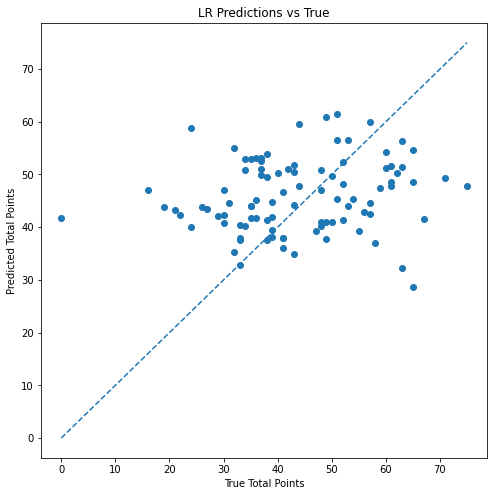

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(y_test, regr_predict_Test)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('LR Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## Linear Regression with Cross Validation

In [107]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [108]:
#view mean absolute error
print("MAE:",mean(absolute(scores)))
print("RMSE:",sqrt(mean(absolute(scores))))

MAE: 10.912193855694083
RMSE: 3.3033609938506694


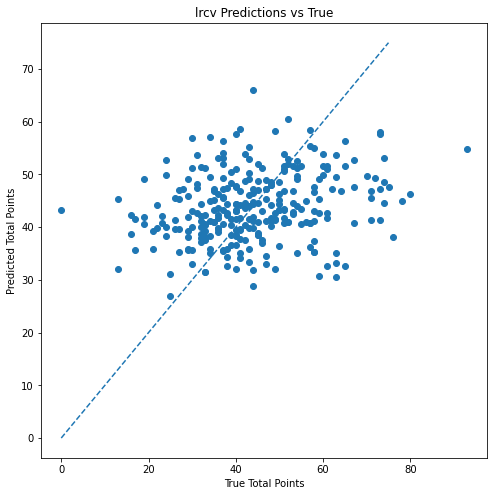

In [109]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y,
                         cv=cv, n_jobs=-1)

plt.figure(figsize=(8,8))
plt.scatter(y, predictions)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('lrcv Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## GradientBoostingRegressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB_predict_Train=GB.predict(X_train)

RMSE1=sqrt(mean_squared_error(y_train,GB_predict_Train))
print("RMSE (training) for GB:{0:10f}".format(RMSE1))

GB_predict_Test=GB.predict(X_test)

RMSE= sqrt(mean_squared_error(y_test,GB_predict_Test))
print("RMSE (Test Data) for GB:{0:10f}".format(RMSE))

RMSE (training) for GB:  5.734626
RMSE (Test Data) for GB: 15.774454


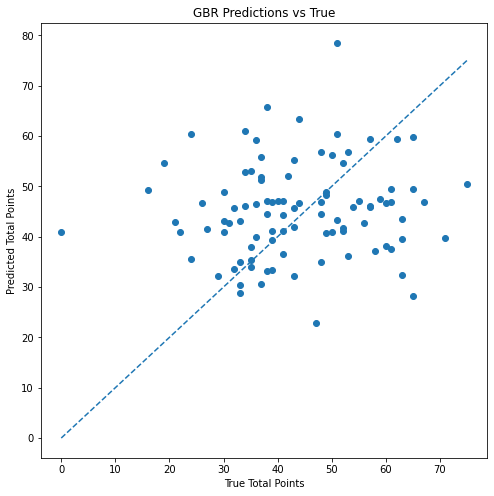

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.scatter(y_test, GB_predict_Test)
plt.plot(range(min(y_test), max(y_test)+1), range(min(y_test), max(y_test)+1), linestyle='--')
plt.title('GBR Predictions vs True')
plt.xlabel('True Total Points')
plt.ylabel('Predicted Total Points');

## Predictions Game 1 

In [50]:
#make bet 
Bet = pd.read_csv('/Users/allisonkruse/desktop/nfl/2023_game_one_v2.csv')
Bet.head()

,Date,Visitor,Home,Total_Score,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,9/7/23,Detroit Lions,Kansas City Chiefs,NaN,29.2,115.9,297.8,413.6,26.6,128.2,...,95.3,2.411765,0.705882,104.7,1.529412,0.705882,94.2,1.705882,0.411765,99.3


In [51]:
#To make predictions, the data frame needs to match the format (number of columns and column titles) of the training data.
Bet = Bet.iloc[: , 4:]

Bet.head()

,h_pts_game,h_rush_yd_game,h_pass_yd_game,h_tt_ytd_game,v_pts_game,v_rush_yd_game,v_pass_yd_game,v_tt_ytd_game,h_df_pts_game,h_df_rush_yd_game,...,h_df_passer_rate,h_o_tds_game,h_o_int_game,h_o_passer_rate,v_df_tds_game,v_df_int_game,v_df_passer_rate,v_o_tds_game,v_o_int_game,v_o_passer_rate
0,29.2,115.9,297.8,413.6,26.6,128.2,251.8,380,21.7,107.2,...,95.3,2.411765,0.705882,104.7,1.529412,0.705882,94.2,1.705882,0.411765,99.3


### GradientBoostingRegressor

In [52]:
GB_predict_Tonight=GB.predict(Bet)
print(GB_predict_Tonight)

[38.55121128]


### Linear Regression

In [53]:
LR_predict_Tonight=regr.predict(Bet)
print(LR_predict_Tonight)

[58.03801198]


### Randon Forest

In [100]:
print(rf.predict(Bet))

[42.79]
